# The Indiana Training Program in Public and Population Health Informatics
## EXERCISE 3  - BMI calculation using height and weight
### 3c. Creating BMI values from weight and height information, visualization


In this exercise, we will  enhance the BMI information of the patients using the height and weight records we purged from the clinical_vars.csv data file. With the addition of the newly calculated BMI, we will be able to observe BMI change over time (age). 


### Let's pick up from where we left of at the end of Exercise 3b
Before we start working in R, we need to set the working directory. We will then check the folder contents and load the wt_ht_wide.RDATA file that we saved at the end of Exercise 3b

In [1]:
getwd()  # Check the current directory.
setwd("/N/dc2/projects/T15/Sample") # Set the working folder. Change this path to the location where YOUR files are.
list.files()
file.info("wt_ht_wide.RDATA")
load(file = "wt_ht_wide.RDATA")

[1] "/N/dc2/projects/T15/Sample"

[1] "1-Descriptives.R"                 "2.1-Sampling.R"                  
 [3] "2.2-Pertubration.R"               "3-Exercises 1.R"                 
 [5] "3-Exercises 32 Algorithm Check.R" "T-15 Ex 1 RACE.ipynb"            
 [7] "T-15 Ex 2 NDC.ipynb"              "T-15 Ex 3 .1 BMI.ipynb"          
 [9] "T-15 Ex 3.2 BMI.ipynb"            "T-15 Ex 3.3 BMI.ipynb"           
[11] "Untitled.ipynb"                   "Untitled1.ipynb"                 
[13] "clinical_vars.csv"                "diagnosis.csv"                   
[15] "encounters.csv"                   "ht_summary.csv"                  
[17] "medication.csv"                   "patients.csv"                    
[19] "t2d Exercises 1.ipynb"            "unindc.dta"                      
[21] "wt_ht.RDATA"                      "wt_ht_final.RDATA"               
[23] "wt_ht_wide.RDATA"

,size,isdir,mode,mtime,ctime,atime,uid,gid,uname,grname
wt_ht_wide.RDATA,567537,FALSE,660,2018-10-21 14:14:55,2018-10-21 14:14:55,2018-10-23 02:29:14,498945,1297,ukirbiyi,T15


In [1]:
#If you haven't already done so, install the tidyverse package using the code below. 
install.packages("tidyverse")
library(tidyverse)

Warning message in install.packages("tidyverse"):
"'lib = "/gpfs/hps/soft/rhel7/r/3.3.1/lib64/R/library"' is not writable"

ERROR: Error in install.packages("tidyverse"): unable to install packages


### Checking double entries (metric & imperial) for the same day for the same patient
As observed in Exercise 3b for the same observation types, we can expect disagreements among the "metric" and "imperial" measurements of the same kind (height in metric and imperial, and weight in metric and imperial). 
Let's take the same type of observations recorded for the same day for the same patient. We will  mark these rows by creating columns named ht_double and wt_double. We will assign the value "1" for double meassurement and "0" otherwise. The sum of these columns will give us the number of double measurements. 

In [2]:
wt_ht_wide$ht_double <- ifelse( !is.na(wt_ht_wide$`Height Metric`) & 
                               !is.na(wt_ht_wide$`Height(In)`),
                             1, 0)
sum(wt_ht_wide$ht_double) # Same day height measurements that are in both imperial and metric.

wt_ht_wide$wt_double <- ifelse( !is.na(wt_ht_wide$`Weight Metric`) & 
                               !is.na(wt_ht_wide$`Weight Lbs`),
                             1, 0)
sum(wt_ht_wide$wt_double) # Same day weight measurements that are in both imperial and metric.

# Out of curiosity, let's also look at observations that have all 4 measurements on the same day. 
nrow(wt_ht_wide %>% filter(ht_double ==1, wt_double ==1))


ERROR: Error in ifelse(!is.na(wt_ht_wide$`Height Metric`) & !is.na(wt_ht_wide$`Height(In)`), : object 'wt_ht_wide' not found


### Checking the differences among metric and imperial measurements
Now that we have marked double measurement types, we can query the number of observations that exceed a set value difference. We will use a 3cm difference for height and a 3kg difference for weight, and will calculate the number of instances that exceed these differences. 

We will also mark these observations by creating a column named "err" and assign "1" for error and "0" otherwise. 
The two different codes below give the same values; one using the `filter` function(from dplyr), the other using base R.  

In [4]:
# Number of same-day height measurements that differ by more than 3cm for the same patient.
nrow(wt_ht_wide %>% filter(ht_double==1, `Height Metric`- `Height(In)`*2.54 > 3 ))
# Tag the large differences as the err variable.
wt_ht_wide$ht_err <- ifelse(wt_ht_wide$ht_double==1 
                         & wt_ht_wide$`Height Metric`- wt_ht_wide$`Height(In)`*2.54 > 3,
                         1,0)
sum(wt_ht_wide$ht_err) 
                    

# Number of same-day weight measurements that differ by more than 3kg for the same patient.
nrow(wt_ht_wide %>% filter(wt_double==1, `Weight Metric`- `Weight Lbs`*.4536 > 3 ))
wt_ht_wide$wt_err <- ifelse(wt_ht_wide$wt_double==1 
                         & wt_ht_wide$`Weight Metric`- wt_ht_wide$`Weight Lbs`*.4536> 3,
                         1,0)
sum(wt_ht_wide$wt_err)

[1] 766

[1] 766

[1] 4359

[1] 4359

### Remove the measurements with a large difference (more than 3cm or 3kg)
Note that we use the dplyr `filter` function from the Tidyverse package to only keep the rows with NO "err" (either for height or weight).

In [5]:
wt_ht_wide <- wt_ht_wide %>% filter(ht_err == 0 & wt_err == 0) 
head(wt_ht_wide)

STUDYID,DAYS_VIS_INDEX,BMI,Height Metric,Height(In),Weight Lbs,Weight Metric,ht_double,wt_double,ht_err,wt_err
16,-392,NA,NA,NA,144,NA,0,0,0,0
16,-382,NA,NA,NA,148,NA,0,0,0,0
16,-266,NA,NA,NA,145,NA,0,0,0,0
16,-245,NA,NA,NA,152,NA,0,0,0,0
16,-200,NA,NA,NA,144,NA,0,0,0,0
16,-154,NA,NA,NA,145,NA,0,0,0,0


### Consolidating the metric and imperial values
We will be using the `mutate` function from the dplyr package in Tidyverse. Note that the code below overwrites the height value whenever there is a double entry. We will correct this by taking the average of the two values (after conversion to metric). We can easily find these rows since we have marked them with the ht_double and wt_double variables that we created. We can do a quick check with the `head` function.

In [6]:
# Transform the values to the metric system.
wt_ht_wide <- mutate(wt_ht_wide, height = `Height Metric`, height = 2.54 *`Height(In)`)
wt_ht_wide <- mutate(wt_ht_wide, weight = `Weight Metric`, weight = `Weight Lbs`*.4536)

# Of those who had close measurements for the same day, replace the height and weight values by the average of the two.
head(wt_ht_wide$height[wt_ht_wide$ht_double ==1])
wt_ht_wide$height <- ifelse(wt_ht_wide$ht_double==1, 
                            (wt_ht_wide[,4]+wt_ht_wide[,5]*2.54)/2, wt_ht_wide$height)

# Let's look at the initial height values.
head(wt_ht_wide$height[wt_ht_wide$ht_double ==1])

[1] 162.56 162.56 172.72 160.02 185.42 177.80

[1] 162.28 162.28 167.86 160.01 185.21 172.90

### Cleaning
Let's remove the ht_err, wt_err, ht_double, and wt_double columns since we don't need them anymore. 

In [7]:
# Remove the columns that are no longer needed to keep the data tidy.
wt_ht_wide$ht_err <- NULL
wt_ht_wide$wt_err <- NULL
wt_ht_wide$ht_double <- NULL
wt_ht_wide$wt_double <- NULL
head(wt_ht_wide) 


STUDYID,DAYS_VIS_INDEX,BMI,Height Metric,Height(In),Weight Lbs,Weight Metric,height,weight
16,-392,NA,NA,NA,144,NA,NA,65.3184
16,-382,NA,NA,NA,148,NA,NA,67.1328
16,-266,NA,NA,NA,145,NA,NA,65.7720
16,-245,NA,NA,NA,152,NA,NA,68.9472
16,-200,NA,NA,NA,144,NA,NA,65.3184
16,-154,NA,NA,NA,145,NA,NA,65.7720


### Calculating (summarizing) the height value for each patient
While the weight value changes relatively often, the height value stays mostly the same. For our purposes, to calculate BMI, we will consider the patient's height to be constant. We will create a second dataset that summarizes the mean, median, standard deviation and count (including non-NA count) of each patient's height values. 
We will be using dplyr's `group_by` and `summarise` function in a piping fashion. 

In [8]:
# Summarize height by patient.
length(unique(wt_ht_wide$STUDYID)) # Number of unique patients.
ht_summary <- wt_ht_wide %>% group_by(STUDYID) %>% 
                    summarise(ht_mean= mean(height, na.rm = TRUE), 
                              ht_median = median(height, na.rm = TRUE),
                              ht_sd = sd(height, na.rm = TRUE),
                              n= n(), ht_non_NA_n= sum(!is.na(height)))
head(ht_summary)

[1] 9079

STUDYID,ht_mean,ht_median,ht_sd,n,ht_non_NA_n
16,147.3200,147.32,NA,14,1
103,157.4800,157.48,NA,9,1
179,182.2174,185.42,7.966836,32,23
195,158.7500,154.94,5.773497,102,10
239,178.4626,180.34,8.872413,246,23
251,163.4067,162.56,6.392193,20,3


### Transfer the median height information to wt_ht_wide dataset
Now that we have found the height values for each patient we can move it to our dataset. Normally the height values follow a normal distribution, however there are still rare, unsusual measurements in the patient's height data. The median is more immune to these kinds of changes and should be close to mean values in a normally distributed data. 

In [9]:
# Transfer the height from summary to the wt_ht_wide data file.
wt_ht_wide <- merge(x = wt_ht_wide, y = ht_summary[,c("STUDYID", "n", "ht_mean")], 
                    by = "STUDYID", all.x= TRUE) 
head(wt_ht_wide)

STUDYID,DAYS_VIS_INDEX,BMI,Height Metric,Height(In),Weight Lbs,Weight Metric,height,weight,n,ht_mean
16,-392,NA,NA,NA,144,NA,NA,65.3184,14,147.32
16,-382,NA,NA,NA,148,NA,NA,67.1328,14,147.32
16,-266,NA,NA,NA,145,NA,NA,65.7720,14,147.32
16,-245,NA,NA,NA,152,NA,NA,68.9472,14,147.32
16,-200,NA,NA,NA,144,NA,NA,65.3184,14,147.32
16,-154,NA,NA,NA,145,NA,NA,65.7720,14,147.32


### Creating the final dataset 
We are now ready to create our final dataset. We begin by cleaning the data and removing columns that are no longer needed to tidy up the data. Remove the height columns other than ht_mean, ie  columns 4, 5 ,and  8. Remove the metric and imperial weight columns (columns 6 and 7).

In [10]:
wt_ht_final <- wt_ht_wide[, -c(4:8)]
head(wt_ht_final)

STUDYID,DAYS_VIS_INDEX,BMI,weight,n,ht_mean
16,-392,NA,65.3184,14,147.32
16,-382,NA,67.1328,14,147.32
16,-266,NA,65.7720,14,147.32
16,-245,NA,68.9472,14,147.32
16,-200,NA,65.3184,14,147.32
16,-154,NA,65.7720,14,147.32


### Adding patient age to the observations
We will merge the patient data file used in Exercise 1 with our wt_ht_final dataset. We want to keep both STUDYID and INDEX_AGE from the patient data file. We can use STUDYID to merge the files together.

In [11]:
# Join the INDEX_AGE values from the patient file with the wt_ht_final columns.
patients <- read.csv("patients.csv", header= TRUE)

wt_ht_final <- merge(x = wt_ht_final, y = patients[,c("STUDYID", "INDEX_AGE")], 
           by = "STUDYID", all.x= TRUE) 
rm (patients)
head(wt_ht_final)

STUDYID,DAYS_VIS_INDEX,BMI,weight,n,ht_mean,INDEX_AGE
16,-392,NA,65.3184,14,147.32,76
16,-382,NA,67.1328,14,147.32,76
16,-266,NA,65.7720,14,147.32,76
16,-245,NA,68.9472,14,147.32,76
16,-200,NA,65.3184,14,147.32,76
16,-154,NA,65.7720,14,147.32,76


### Creating the final variables for our final dataset.
We next need to calculate the age at observation and the BMI. These two are the final variables for our final dataset. We will be using the `mutate` function from the dplyr package. 

In [12]:
# Calculate the age at the observed weight.
wt_ht_final <- wt_ht_final %>% mutate(AGE = INDEX_AGE + DAYS_VIS_INDEX/365.25) 
# Calculate the BMI at the observed weight.
wt_ht_final <- wt_ht_final %>% mutate(BMI_calc = weight/(ht_mean/100)^2) 
head(wt_ht_final)

STUDYID,DAYS_VIS_INDEX,BMI,weight,n,ht_mean,INDEX_AGE,AGE,BMI_calc
16,-392,NA,65.3184,14,147.32,76,74.92676,30.09623
16,-382,NA,67.1328,14,147.32,76,74.95414,30.93224
16,-266,NA,65.7720,14,147.32,76,75.27173,30.30523
16,-245,NA,68.9472,14,147.32,76,75.32923,31.76824
16,-200,NA,65.3184,14,147.32,76,75.45243,30.09623
16,-154,NA,65.7720,14,147.32,76,75.57837,30.30523


### Saving the wt_ht_final data in RDATA format 
Now that we have created our final variables, we should save the data file in RDATA format so that we can easily use it later.

In [13]:
save(wt_ht_final, file ="wt_ht_final.RDATA")
file.info("wt_ht_final.RDATA")

,size,isdir,mode,mtime,ctime,atime,uid,gid,uname,grname
wt_ht_final.RDATA,1168411,FALSE,660,2018-10-23 02:39:40,2018-10-23 02:39:40,2018-10-23 02:31:26,498945,1297,ukirbiyi,T15


### Visualizing all BMI over age data 
To visualize BMI over time using age at observation, we will use the Hexbin package.  

In [14]:
# If you haven't done so already, use the code below to install the Hexbin package.
install.packages("hexbin") 
library(hexbin)

Installing package into '/gpfs/home/u/k/ukirbiyi/Carbonate/R/x86_64-pc-linux-gnu-library/3.3'
(as 'lib' is unspecified)
Warning message in install.packages("hexbin"):
"installation of package 'hexbin' had non-zero exit status"

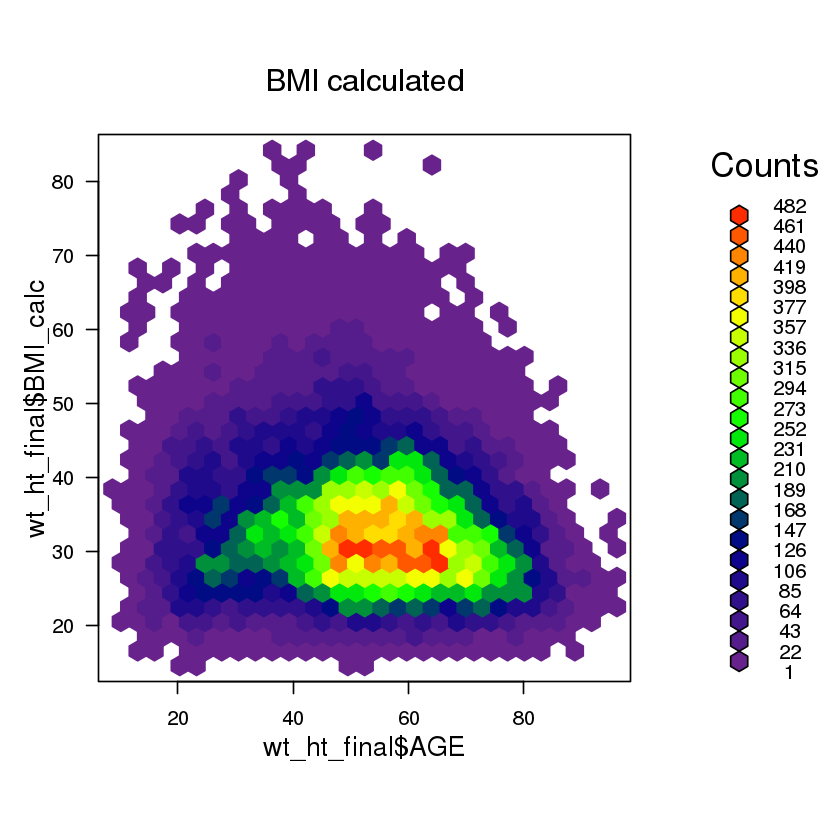

In [15]:
cols <- colorRampPalette(c("darkorchid4","darkblue","green","yellow", "red") )
hbin <- hexbin(wt_ht_final$AGE, wt_ht_final$BMI_calc)
#Purple color
plot(hbin, main="BMI calculated", colorcut = seq(0,1,length.out=24),
     colramp = function(n) cols(24) ) # , legend = 0 )


****
## End of Exercise 3c